<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


#### In this assignment, we are going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the House Prices - Advanced Regression Techniques competition on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [3]:
# Chech Data Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check Data Statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Check Data Types
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
# Check top 5 rows
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Objectives


### Here we need to predict the Sales of House using the parameters provied.

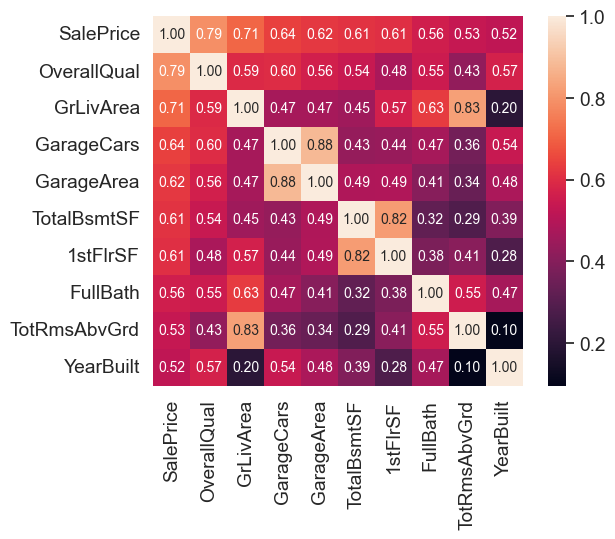

In [13]:
# SalePrice correlation matrix with top k variables
corrmat = train.corr(numeric_only=True)
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/home/freak/Freak/Trainings/Coursera-Assignments/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


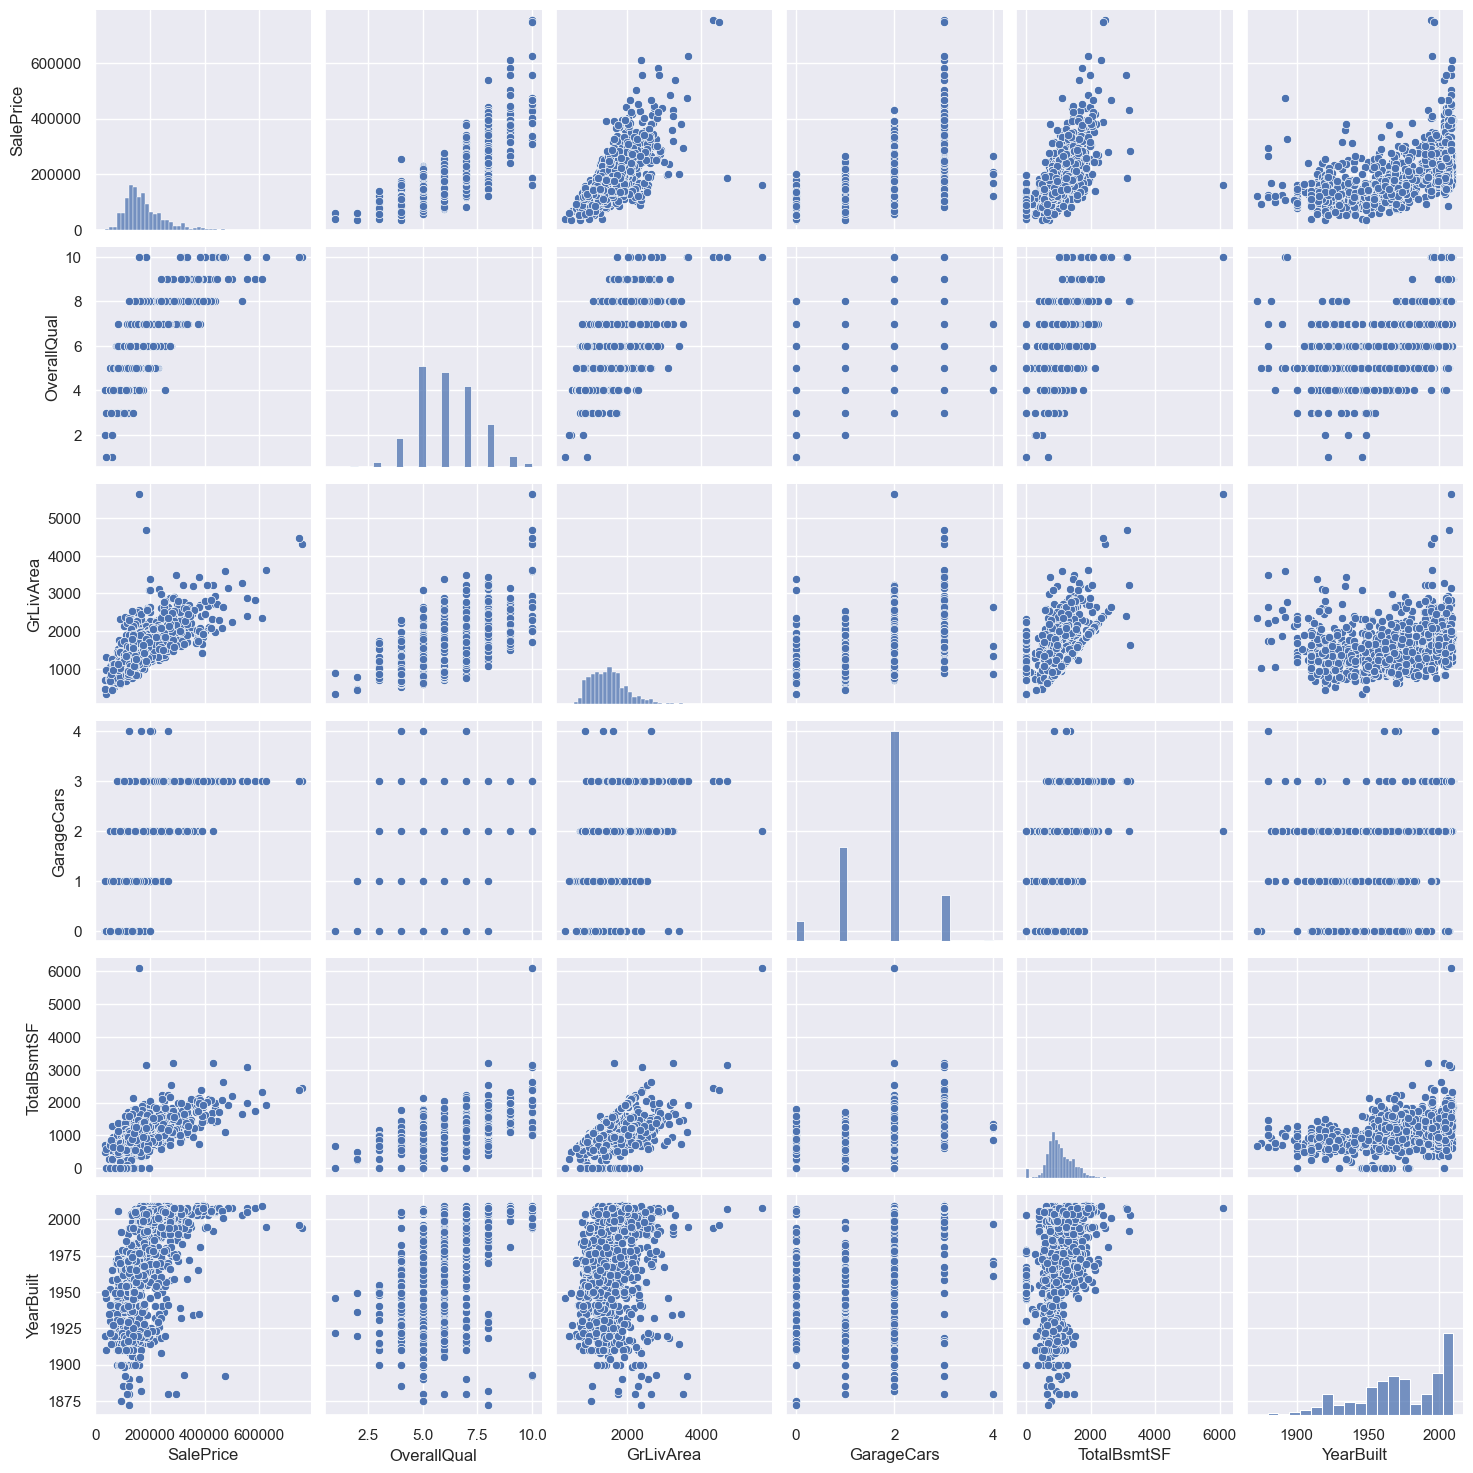

In [15]:
#scatterplot with some important variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.set()
sns.pairplot(train[cols], size = 2.5)
plt.show();

# 3. Linear Regression Models


In [18]:
## Lets chose these variables
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]
Y = train['SalePrice']

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
## Scale the variables
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.fit_transform(X_test)

In [22]:
# Generate Models
from sklearn.linear_model import Lasso, Ridge, LinearRegression
ls = Lasso()
rd = Ridge()
lr = LinearRegression()

In [27]:
# Perform Grid Search CV
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 20]}
ls_cv = GridSearchCV(ls, params, cv=5)
ls_cv.fit(X_train_scaled, Y_train)
ls_cv.best_estimator_

Lasso(alpha=20)

In [28]:
ls_cv.best_estimator_.score(X_test_scaled, Y_test)

0.7853594956733138

In [29]:
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 20]}
rd_cv = GridSearchCV(rd, params, cv=5)
rd_cv.fit(X_train_scaled, Y_train)
rd_cv.best_estimator_

Ridge(alpha=20)

In [30]:
rd_cv.best_estimator_.score(X_test_scaled, Y_test)

0.7845307715057022

In [31]:
lr.fit(X_train_scaled, Y_train)
lr

LinearRegression()

In [32]:
lr.score(X_test_scaled, Y_test)

0.7854098289132629

# 4. Insights and key findings


## Insight:
While all three models (Lasso, Ridge, and Linear Regression) exhibit comparable performance with a score of approximately 0.78 in predicting house prices, their underlying mechanisms and potential implications differ significantly.  

## Key Finding:
The similarity in performance suggests that the relationship between the features and house prices is predominantly linear, and there might not be a significant presence of multicollinearity or overfitting in the data. However, to gain deeper insights, further analysis is required, including:  
  
**Coefficient Analysis:** Examining the coefficients of each model can reveal how different features impact house prices and identify potential redundancies or influential variables. Lasso's ability to perform feature selection by shrinking coefficients to zero could be particularly valuable here.  
**Regularization Parameter Tuning:** For Lasso and Ridge, experimenting with different regularization parameters (alpha) might lead to improved performance or uncover optimal levels of feature shrinkage.  
**Model Complexity and Interpretability:** Linear Regression offers the highest interpretability due to its simplicity. If model explainability is crucial, it might be preferred over Lasso and Ridge, despite their potential regularization benefits.  

# 5. Next Steps


Given that the three models have similar performance scores, the next steps involve a deeper dive into model characteristics and potential improvements:  
  
### 1. Detailed Model Comparison:
**Coefficient Analysis:** Examine the coefficients of each model to understand feature importance and identify potential collinearity or redundant features.  
**Lasso:** Pay particular attention to features with zero coefficients, as these might be less relevant.
Regularization Parameter Tuning: Experiment with different alpha values for Lasso and Ridge to optimize performance and potentially improve the model.  
**Cross-Validation:** Employ cross-validation to get a more robust estimate of model performance and identify potential overfitting.  
### 2. Feature Engineering:
**Create New Features:** Consider creating new features from existing ones that might capture additional information or improve model performance. For example, combining multiple features into interaction terms or creating polynomial features.  
**Feature Scaling:** Ensure features are on a similar scale to prevent bias in model coefficients.  
### 3. Model Ensemble:
**Combine Predictions:** Explore techniques like averaging or weighted averaging of predictions from the three models to potentially improve overall accuracy.  
**Bagging or Boosting:** Consider ensemble methods like bagging or boosting to create more robust models.  
### 4. Evaluate Alternative Metrics:
**Beyond R-squared:** Explore other metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or Root Mean Squared Error (RMSE) to gain a more comprehensive understanding of model performance.  
**Distribution of Errors:** Analyze the distribution of errors to identify potential patterns or biases in the model's predictions.  
### 5. Consider Other Models:
**Explore Alternatives:** If the current models are not satisfactory, consider trying different regression techniques like Elastic Net, Decision Trees, or Random Forests.  

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
